# 1) Install Library yang dibutuhkan


In [ ]:
pip install Sastrawi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2) Import Library yang dibutuhkan dan load dataset yang akan digunakan

In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import remove_stopwords
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict


df = pd.read_csv('scraped_data_hsr edited.csv')
print(df.head())


        userName  score               at  \
0           Rin.      5   3/20/2024 7:41   
1          mitha      5   2/21/2024 9:08   
2          Aya丸山      5  2/12/2024 22:59   
3  Samuel Manalu      4  2/13/2024 10:26   
4   Ozzol Thefox      5    2/6/2024 2:44   

                                             content     type  
0  Overall udah good, gameplay nya asik ditambah ...  Positif  
1  game nya bagus + keren! (wlpun trun base gamen...  Positif  
2  Turn Base tapi bisa Eksplore dunia yang luas d...  Positif  
3  Untuk gamenya udh bagus dari segi story juga u...  Positif  
4  Lumayan rekomended sih nih game, udah sekelas ...  Positif  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3) Drop missing value apabila ada

In [ ]:
df_cleaned = df.dropna()
print(df_cleaned)

                                         userName  score                at  \
0                                            Rin.      5    3/20/2024 7:41   
1                                           mitha      5    2/21/2024 9:08   
2                                           Aya丸山      5   2/12/2024 22:59   
3                                   Samuel Manalu      4   2/13/2024 10:26   
4                                    Ozzol Thefox      5     2/6/2024 2:44   
..                                            ...    ...               ...   
393                                    Nur Inayah      5   12/18/2023 6:22   
394                         Muhammad ammar Ayyash      5   1/10/2024 12:27   
395                                 Tommy Dimyati      1   11/15/2023 8:43   
396  H3705 CIVWVHOW / מוחמד סולה / Μοχάμεντ Σολέχ      5  11/20/2023 15:23   
397                              Mohd Tri Wardani      3   11/18/2023 4:18   

                                               content     type

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 4) Drop colum "userName" karena tidak digunakan

In [ ]:
df_cleaned = df.drop(columns=['userName'])
print(df_cleaned)

     score                at  \
0        5    3/20/2024 7:41   
1        5    2/21/2024 9:08   
2        5   2/12/2024 22:59   
3        4   2/13/2024 10:26   
4        5     2/6/2024 2:44   
..     ...               ...   
393      5   12/18/2023 6:22   
394      5   1/10/2024 12:27   
395      1   11/15/2023 8:43   
396      5  11/20/2023 15:23   
397      3   11/18/2023 4:18   

                                               content     type  
0    Overall udah good, gameplay nya asik ditambah ...  Positif  
1    game nya bagus + keren! (wlpun trun base gamen...  Positif  
2    Turn Base tapi bisa Eksplore dunia yang luas d...  Positif  
3    Untuk gamenya udh bagus dari segi story juga u...  Positif  
4    Lumayan rekomended sih nih game, udah sekelas ...  Positif  
..                                                 ...      ...  
393  Pake samsung A71 masih oke aja nih game malah ...  Positif  
394  Game ini sangat bagus dan menyenangkan tapi ka...  Positif  
395  Makin kesini mak

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 5) Hitung persentase dan jumlah masing-masing skor review dan tampilkan visualisasinya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


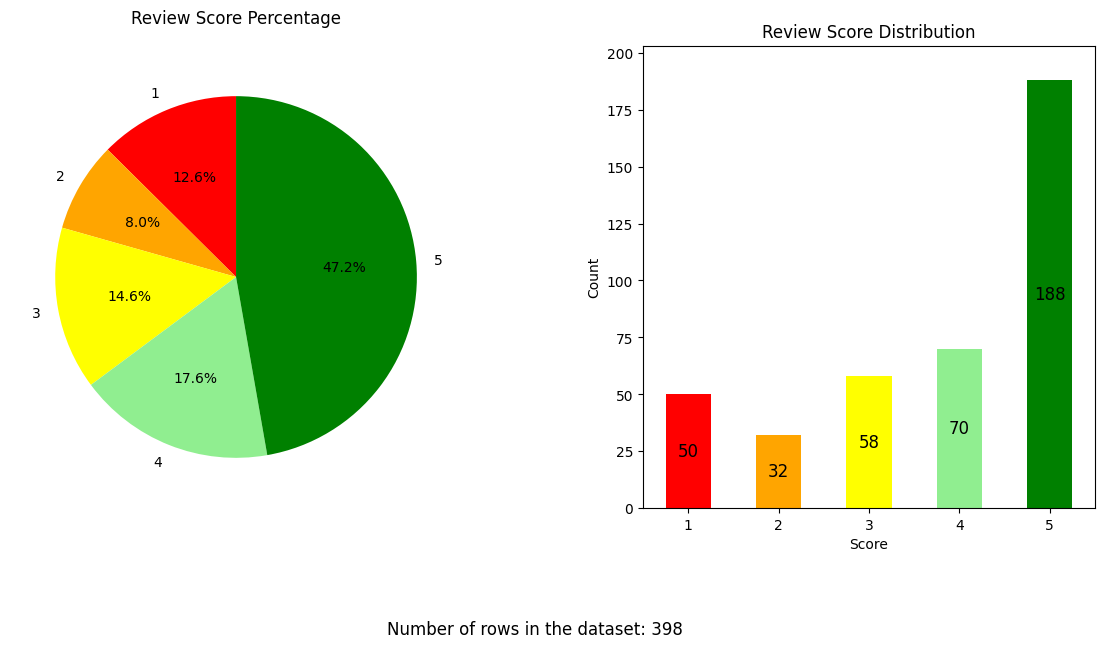

In [ ]:
score_counts = df['score'].value_counts().sort_index()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
pie_colors = [colors[i-1] for i in score_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
axes[0].set_title('Review Score Percentage', pad=20)
score_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
max_count = score_counts.max()

for i, count in enumerate(score_counts):
    axes[1].text(i, count / 2, str(count), ha='center', va='center', fontsize=12, color='black')
axes[1].set_title('Review Score Distribution')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, max_count + 15)
axes[1].tick_params(axis='x', rotation=0)

plt.subplots_adjust(wspace=0.4)

fig.text(0.5, -0.1, f"Number of rows in the dataset: {len(df_cleaned)}", ha='center', fontsize=12)

plt.subplots_adjust(wspace=0.4)

plt.show()

# 6) Hitung persentase dan jumlah masing-masing tipe review dan tampilkan visualisasinya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


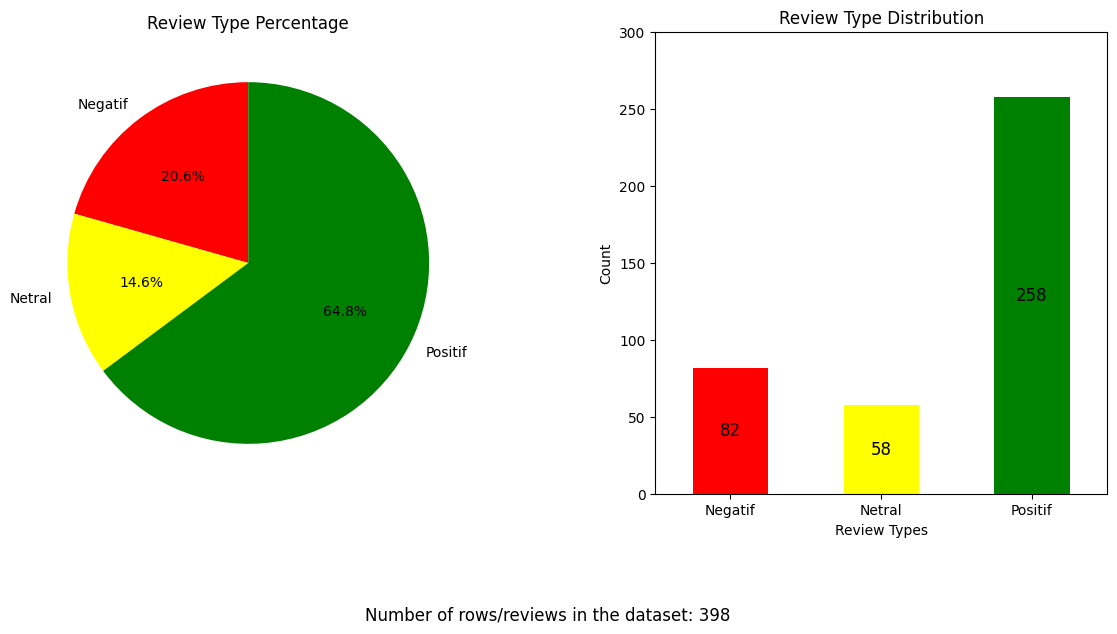

In [ ]:
type_counts = df['type'].value_counts()
colors = {'Positif': 'green', 'Netral': 'yellow', 'Negatif': 'red'}
desired_order = ['Negatif', 'Netral', 'Positif']
type_counts = type_counts.reindex(desired_order)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[type] for type in type_counts.index])
axes[0].set_title('Review Type Percentage')
type_counts.plot(kind='bar', stacked=True, color=[colors[type] for type in type_counts.index], ax=axes[1])

for i, count in enumerate(type_counts):
    axes[1].text(i, count / 2, str(count), ha='center', va='center', fontsize=12, color='black')
axes[1].set_title('Review Type Distribution')
axes[1].set_xlabel('Review Types')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 300)
axes[1].tick_params(axis='x', rotation=0)

plt.subplots_adjust(wspace=0.4)

fig.text(0.5, -0.1, f"Number of rows/reviews in the dataset: {len(df_cleaned)}", ha='center', fontsize=12)

plt.subplots_adjust(wspace=0.4)

plt.show()

# 7) Hitung persentase dan jumlah total review di setiap bulan dan tampilkan visualisasinya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


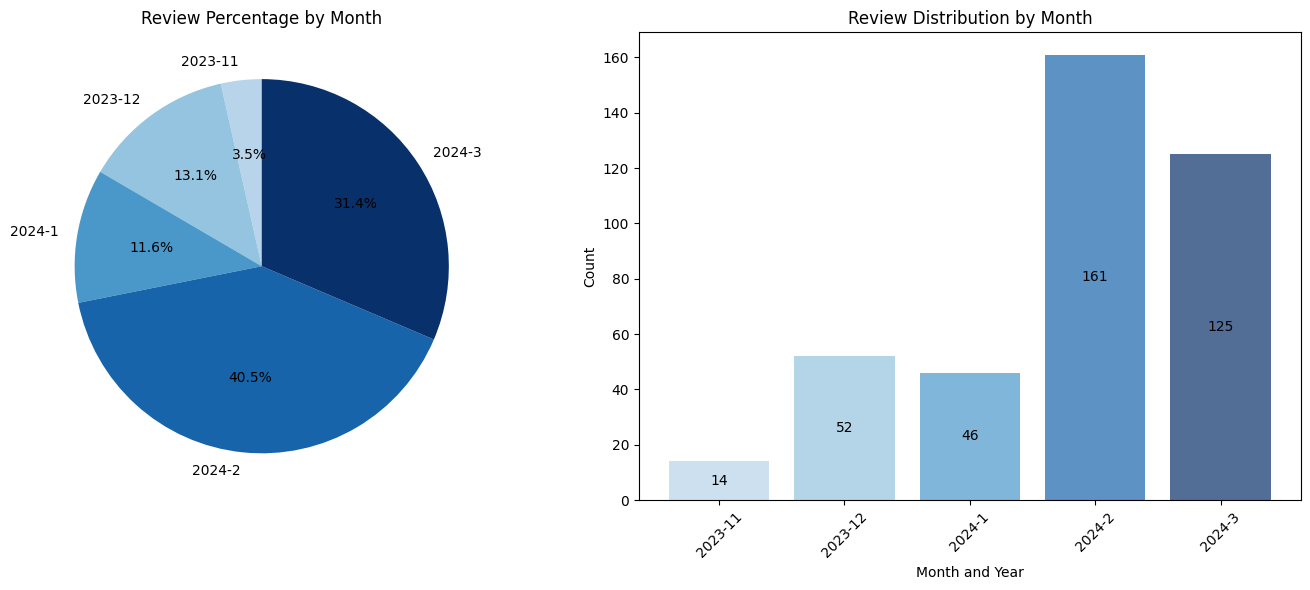

In [ ]:
df['at'] = pd.to_datetime(df['at'])

df['year'] = df['at'].dt.year
df['month'] = df['at'].dt.month

monthly_counts = df.groupby(['year', 'month', 'type']).size().unstack(fill_value=0)
monthly_totals = df.groupby(['year', 'month']).size()

labels = [f"{x[0]}-{x[1]}" for x in monthly_totals.index]
data = monthly_totals.values

num_months = len(labels)
colors = [plt.cm.Blues(0.3)] + list(plt.cm.Blues(np.linspace(0.4, 1, num_months-1)))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Review Percentage by Month')

x = range(len(labels))
bottom = None
for idx, count in enumerate(data):
    axes[1].bar(x[idx], count, color=colors[idx], alpha=0.7)
    axes[1].text(x[idx], count / 2, str(count), ha='center', va='center', fontsize=10, color='black')
axes[1].set_title('Review Distribution by Month')
axes[1].set_xlabel('Month and Year')
axes[1].set_ylabel('Count')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45)

plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()


# 8) Hitung persentase dan jumlah masing-masing tipe review di setiap bulan dan tampilkan visualisasinya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


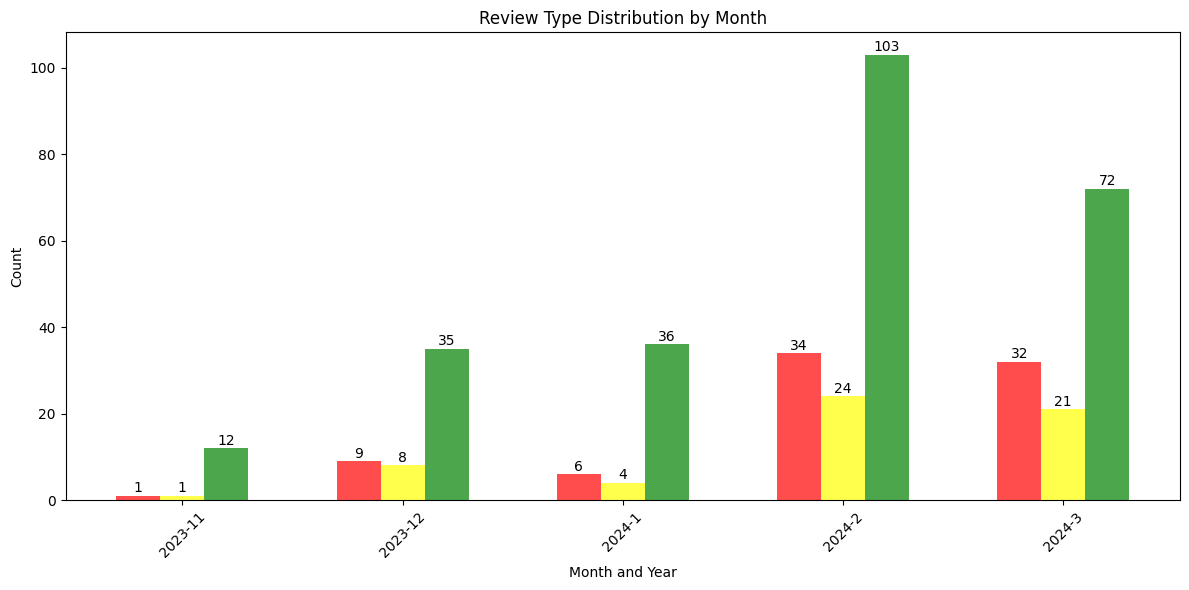

In [ ]:
monthly_counts = df.groupby(['year', 'month', 'type']).size().unstack(fill_value=0)
monthly_totals = df.groupby(['year', 'month']).size()

colors = {'Negatif': 'red', 'Netral': 'yellow', 'Positif': 'green'}

plt.figure(figsize=(12, 6))

for idx, (month_year, counts) in enumerate(monthly_counts.iterrows(), start=1):
    positions = [idx - 0.2, idx, idx + 0.2]

    for i, (review_type, count) in enumerate(counts.items()):
        plt.bar(positions[i], count, width=0.2, color=colors[review_type], label=review_type, alpha=0.7)

        plt.text(positions[i], count + 0.1, str(count), ha='center', va='bottom')


plt.title('Review Type Distribution by Month')
plt.xlabel('Month and Year')
plt.ylabel('Count')
plt.xticks(range(1, len(monthly_counts) + 1), [f"{x[0]}-{x[1]}" for x in monthly_counts.index], rotation=45)

plt.tight_layout()
plt.show()



# 9) Print data isi review sebelum dan sesudah proses preprocessing

In [ ]:
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()


# custom stopwords
custom_stopwords = ['gw', 'yang', 'yg', 'nya', 'aku', 'game', 'gak', 'gk', 'main', 'ga', 'aja', 'kalau', 'padahal', 'buat', 'jadi', 'jadinya', 'mau', 'kok']


# Sasstrawi Preprocess
def preprocess_text(text):
    tokens = text.split()  # Tokenization
    tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]  # non-alphabetic tokens dan custom stopwords
    tokens = [stopword_remover.remove(word) for word in tokens]  # Stopword
    tokens = [word for word in tokens if len(word) > 1]  # short tokens
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return tokens


grouped_reviews = df.groupby('score')['content'].apply(list)

for score, reviews in grouped_reviews.items():
    print(f"Before and After Preprocessing Comparison for Reviews With Score {score}:")

    df_reviews = pd.DataFrame({'Original Review': reviews})

    preprocessed_reviews = [preprocess_text(review) for review in reviews]

    df_reviews['Preprocessed Review'] = preprocessed_reviews

    dictionary = corpora.Dictionary(preprocessed_reviews)
    corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

    print(df_reviews.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Before and After Preprocessing Comparison for Reviews With Score 1:
                                     Original Review  \
0  Update kali ini parah banget sih, padahal sebe...   
1  Bintang satu untuk versi sekarang,setiap perte...   
2  Ngabisin data doang ini mah tiap kali download...   
3  terdapat bug login yaitu jaejngan berputar ter...   
4  Kekurangan dalam honkai star rail tidak banyak...   

                                 Preprocessed Review  
0  [update, kali, parah, banget, update, seta, up...  
1  [bintang, satu, versi, tempur, hp, sering, ala...  
2  [ngabisin, data, doang, mah, tiap, kali, downl...  
3  [dapat, bug, login, jaejngan, putar, terus, la...  
4  [kurang, honkai, star, rail, baik, masalah, cu...  
Before and After Preprocessing Comparison for Reviews With Score 2:
                                     Original Review  \
0  saat Cutscene fps tiba" drop,ntar itu masalah ...   
1  Sebenarnya untuk game play nya bagus hanya saj...   
2  Saya sudah mendownload dat

# 10) Membuat Word Cloud dari data review keseluruhan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
0.015*"main" + 0.013*"bagus" + 0.009*"baik" + 0.009*"sangat" + 0.008*"pas" + 0.007*"karakter" + 0.007*"game" + 0.007*"update" + 0.007*"suka" + 0.007*"banyak"


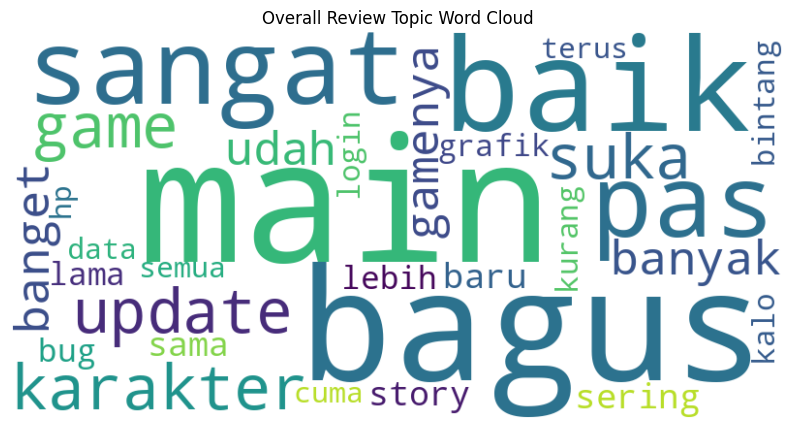

In [ ]:
all_reviews = df['content'].tolist()

custom_stopwords = ['gw', 'yang', 'yg', 'nya', 'aku', 'game', 'gak', 'gk', 'ga', 'aja', 'kalau', 'padahal', 'buat', 'jadi', 'jadinya', 'mau', 'kok']

preprocessed_reviews = [preprocess_text(review) for review in all_reviews]

dictionary = corpora.Dictionary(preprocessed_reviews)
corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

# LDA
lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=15)

# WordCloud
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}:")
    print(topic)

    word_freq = dict(lda_model.show_topic(idx, topn=30))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Overall Review Topic Word Cloud')
    plt.axis('off')
    plt.show()

# 11) Wordcloud untuk setiap tipe review

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


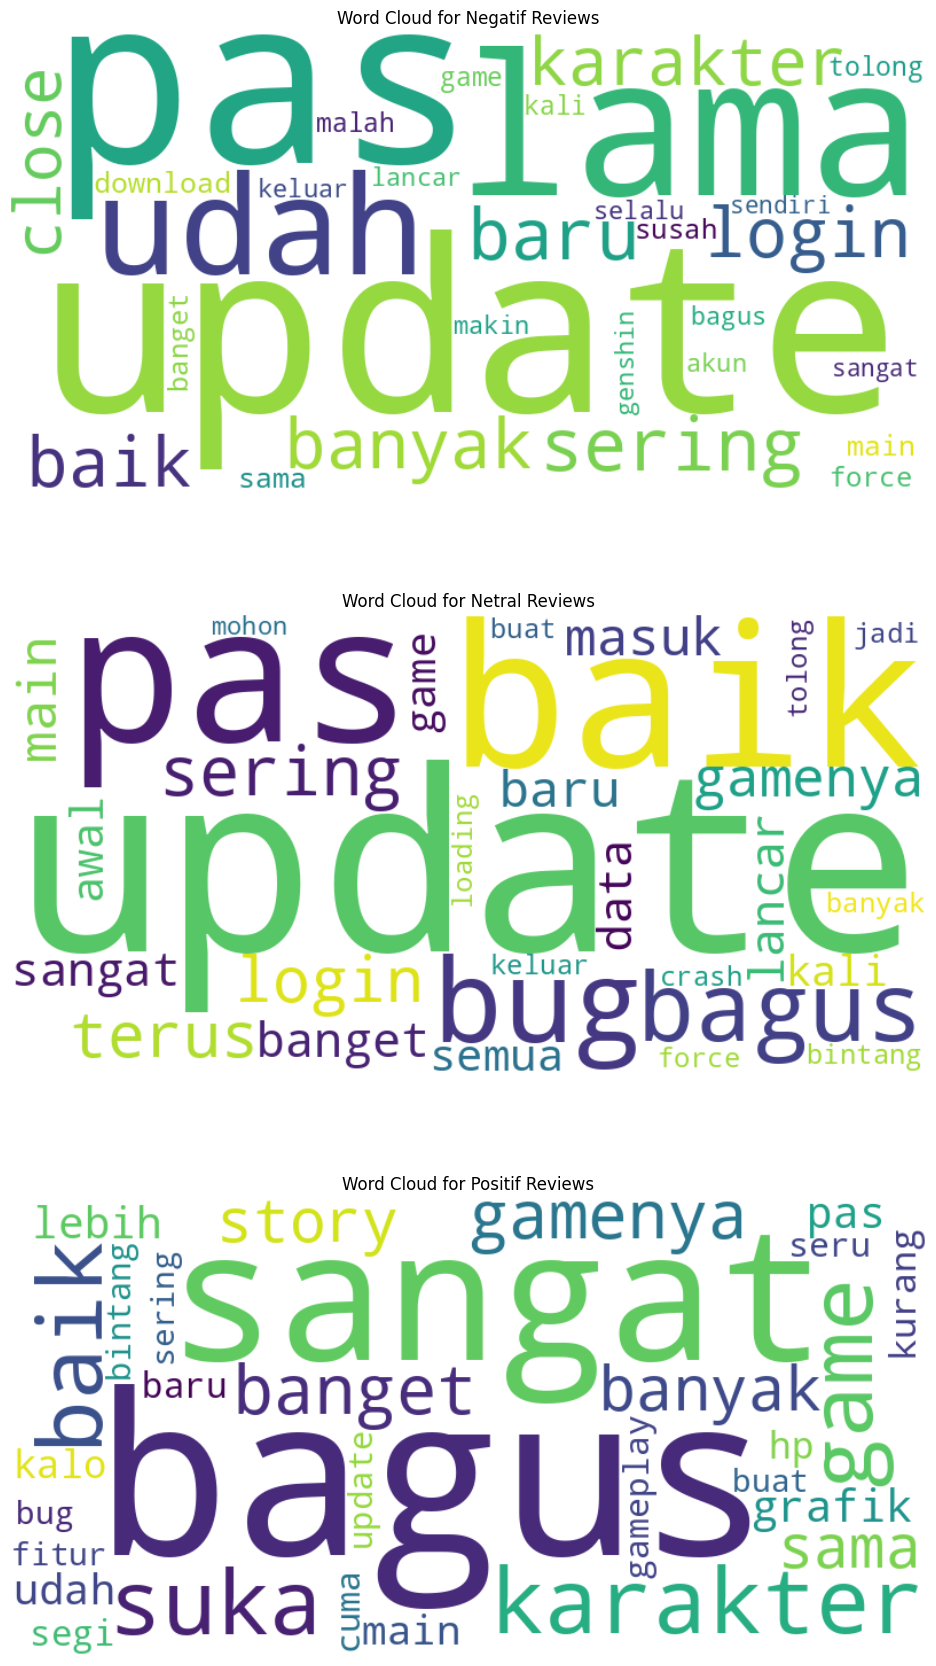

In [ ]:
grouped_reviews = df.groupby('type')['content'].apply(list)

custom_stopwords = ['gw', 'yang', 'yg', 'nya', 'aku', 'game', 'gak', 'gk', 'main', 'ga', 'aja', 'kalau', 'padahal', 'buat', 'jadi', 'jadinya', 'mau', 'kok']

wordclouds = defaultdict()

for review_type, reviews in grouped_reviews.items():
    preprocessed_reviews = [preprocess_text(review) for review in reviews]

    dictionary = corpora.Dictionary(preprocessed_reviews)
    corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

    lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=15)

    word_freq = dict(lda_model.show_topic(0, topn=30))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    wordclouds[review_type] = wordcloud

fig, axs = plt.subplots(len(wordclouds), 1, figsize=(10, 6 * len(wordclouds)))
for i, (review_type, wordcloud) in enumerate(wordclouds.items()):
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Word Cloud for {review_type} Reviews')
    axs[i].axis('off')

plt.tight_layout(pad=3.0)
plt.show()

# 12) Mencari coherence score untuk mengetahui jumlah topik yang optimal digunakan pada model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


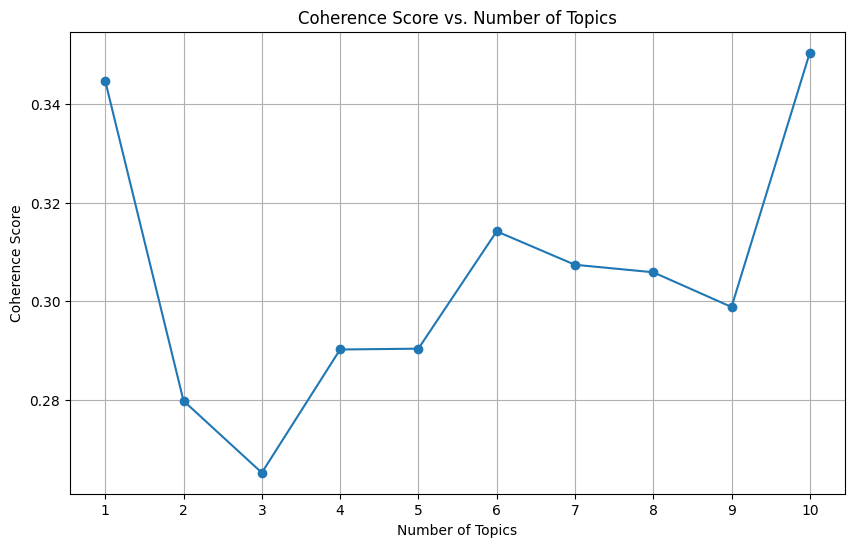

In [ ]:
from gensim.models import CoherenceModel

num_topics_range = range(1, 11)

coherence_scores = []

for num_topics in num_topics_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    coherence_model = CoherenceModel(model=lda_model, texts=preprocessed_reviews, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    coherence_scores.append(coherence_score)

plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()

# 13) Topic modelling untuk setiap skor aplikasi (sesuaikan parameter num_topics dengan jumlah topik minimal yang ditemukan pada langkah 12)

In [ ]:
grouped_reviews = df.groupby('score')['content'].apply(list)

for score, reviews in grouped_reviews.items():
    print(f"Topics for reviews with score {score}:")

    preprocessed_reviews = [preprocess_text(review) for review in reviews]

    dictionary = corpora.Dictionary(preprocessed_reviews)
    corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15) #(sesuaikan parameter num_topics dengan jumlah topik minimal yang ditemukan pada langkah 12)

    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for reviews with score 1:
Topic 0: 0.046*"lama" + 0.031*"update" + 0.023*"baru" + 0.023*"pas" + 0.023*"banget" + 0.016*"tolong" + 0.016*"sering" + 0.016*"jam" + 0.016*"ku" + 0.016*"ngecrash"
Topic 1: 0.022*"force" + 0.022*"close" + 0.022*"sering" + 0.022*"kadang" + 0.011*"download" + 0.011*"grafis" + 0.011*"sekali" + 0.011*"bintang" + 0.011*"udah" + 0.011*"genshin"
Topic 2: 0.035*"kali" + 0.024*"hasil" + 0.024*"data" + 0.024*"apl" + 0.024*"download" + 0.012*"pas" + 0.012*"awal" + 0.012*"masuk" + 0.012*"ni" + 0.012*"mah"
Topic 3: 0.019*"apk" + 0.019*"gw" + 0.019*"kali" + 0.019*"firefly" + 0.013*"lah" + 0.013*"ga" + 0.013*"sinyal" + 0.013*"nonton" + 0.013*"cuma" + 0.013*"mati"
Topic 4: 0.020*"banyak" + 0.020*"baik" + 0.017*"bos" + 0.017*"event" + 0.014*"close" + 0.014*"force" + 0.014*"gamenya" + 0.014*"di" + 0.014*"cheat" + 0.014*"tolong"
Topic 5: 0.027*"pas" + 0.019*"akun" + 0.019*"susah" + 0.016*"udah" + 0.016*"daftar" + 0.016*"versi" + 0.012*"lama" + 0.012*"karakter" + 0.012*"e

# 14) Topic modelling untuk setiap tipe review (sesuaikan parameter num_topics dengan jumlah topik minimal yang ditemukan pada langkah 12)

In [ ]:
grouped_reviews = df.groupby('type')['content'].apply(list)

for review_type, reviews in grouped_reviews.items():
    print(f"Topics for reviews with type '{review_type}':")

    preprocessed_reviews = [preprocess_text(review) for review in reviews]

    dictionary = corpora.Dictionary(preprocessed_reviews)
    corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15) #(sesuaikan parameter num_topics dengan jumlah topik minimal yang ditemukan pada langkah 12)

    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for reviews with type 'Negatif':
Topic 0: 0.026*"keluar" + 0.019*"pas" + 0.015*"ulang" + 0.015*"update" + 0.015*"download" + 0.015*"kali" + 0.012*"main" + 0.012*"app" + 0.012*"masalah" + 0.012*"segera"
Topic 1: 0.021*"lama" + 0.021*"banget" + 0.017*"sama" + 0.017*"firefly" + 0.013*"bug" + 0.013*"kali" + 0.013*"kayak" + 0.013*"ilang" + 0.009*"udah" + 0.009*"login"
Topic 2: 0.038*"udah" + 0.022*"pas" + 0.022*"akun" + 0.017*"login" + 0.017*"download" + 0.017*"daftar" + 0.013*"error" + 0.013*"jaring" + 0.013*"lama" + 0.013*"jam"
Topic 3: 0.032*"close" + 0.032*"force" + 0.028*"lama" + 0.016*"sering" + 0.015*"update" + 0.015*"game" + 0.015*"suka" + 0.015*"sendiri" + 0.015*"karakter" + 0.015*"perlu"
Topic 4: 0.021*"lama" + 0.021*"relic" + 0.016*"data" + 0.016*"apk" + 0.011*"kali" + 0.011*"download" + 0.011*"pas" + 0.011*"banyak" + 0.011*"nonton" + 0.011*"banget"
Topic 5: 0.026*"close" + 0.021*"update" + 0.018*"force" + 0.018*"sering" + 0.015*"susah" + 0.015*"karakter" + 0.015*"selalu" 